## CRM Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

### Problem Statement

Customer Relationship Management (CRM) analysis involves the systematic examination and interpretation of data related to interactions between a business and its customers. Through CRM analysis, companies evaluate customer behavior, preferences, and feedback to gain valuable insights into their needs and expectations

1. Involve a preliminary focus on refining the dataset through essential data preprocessing steps, encompassing outlier management, addressing missing values, and handling potential duplicates.
2. Subsequently, an in-depth Exploratory Data Analysis (EDA) is recommended to uncover patterns and relationships within the data.
3. Within the context of Customer Relationship Management (CRM) analytics, prioritize customer-centric feature engineering. This includes creating metrics like Recency, Frequency, and Monetary values, offering insights into customer transaction patterns.
4. Extend the analysis to incorporate unique product purchase details, derive RFM (Recency, Frequency, Monetary) scores for customer segmentation, and categorize them based on activity levels.
5. Integrate additional customer-centric features such as average days between purchases, preferred shopping days, and peak shopping hours for a holistic understanding.
6. The potential of this case study lies in its capacity to unveil valuable insights into customer behavior and purchasing patterns.

### Data load and preprocessing

In [2]:
df = pd.read_csv("Ecom_CRM_analysis.csv", encoding='latin-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Only quantity is integer, then unit price and customer id is float rest all are object**

### Null value 

In [4]:
#checking null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Description data correction

In [5]:
# Replacing null values of Description column with the description which match to the null StockCode

stock_description = df.dropna(subset=['Description']).set_index('StockCode')['Description'].to_dict()
df['Description'] = df['Description'].fillna(df['StockCode'].map(stock_description))

In [6]:
# confirming any missing values after description imputation
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Fiilling what ever the null description which really are unknown
df['Description']=df['Description'].fillna('Unknown')

In [8]:
# Again confirming
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# found some description mentioned differently and upon checking it needs data correction
df[df['Description'].str.startswith('?')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,12/3/2010 16:50,0.0,NaN,United Kingdom
21518,538090,20956,?,-723,12/9/2010 14:48,0.0,NaN,United Kingdom
38261,539494,21479,?,752,12/20/2010 10:36,0.0,NaN,United Kingdom
43662,540100,22837,?,-106,1/4/2011 16:53,0.0,NaN,United Kingdom
50806,540558,21258,?,-29,1/10/2011 10:04,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
497819,578476,72807B,????missing,-124,11/24/2011 12:45,0.0,NaN,United Kingdom
497820,578477,72807A,???missing,-224,11/24/2011 12:45,0.0,NaN,United Kingdom
497821,578478,72807C,???missing,-428,11/24/2011 12:45,0.0,NaN,United Kingdom
524370,580547,21201,???,-390,12/5/2011 9:29,0.0,NaN,United Kingdom


In [10]:
# converting those to nan
df['Description'] = df['Description'].apply(lambda x: np.nan if x.startswith('?') else x)

In [11]:
# Again imputing null description to any other StockCode
stock_description = df.dropna(subset=['Description']).set_index('StockCode')['Description'].to_dict()
df['Description'] = df['Description'].fillna(df['StockCode'].map(stock_description))

In [12]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
df[df['Description'].str.startswith('?')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [14]:
df.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


### Customer id null values

In [15]:
# Looking for customerid null values
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


#### Based on invoice No

In [16]:
''' 
Now the time stamps are common so grouping the customer ids based on invoice no and imputing 
null customer ids as unknown customer id 1 , 2 , 3.. so on
'''
# checking how many customer can be possible based on this grouping

Possible_unknown_customer=df[df['CustomerID'].isna()].groupby(['InvoiceNo']).ngroups
Possible_unknown_customer

3710

In [17]:
# Replacing the Nan customer id with Unknown customer

def replace_customer_ids(df):
    grouped = df.groupby('InvoiceNo')
    unknown_customer_counter = 1
    for name, group in grouped:
        if group['CustomerID'].isnull().any():
            for index, row in group.iterrows():
                if pd.isnull(row['CustomerID']):
                    df.at[index, 'CustomerID'] = f'unknown customer {unknown_customer_counter}'
            unknown_customer_counter += 1
    return df
df = replace_customer_ids(df)


C:\Users\C9946505\AppData\Local\Temp\ipykernel_28016\4143891689.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown customer 1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'CustomerID'] = f'unknown customer {unknown_customer_counter}'


In [18]:
df[df['CustomerID']=='unknown customer 3710']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,unknown customer 3710,United Kingdom


In [19]:
df[df['CustomerID']=='unknown customer 1']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,12/1/2010 11:52,0.0,unknown customer 1,United Kingdom


In [20]:
df[df['CustomerID']=='unknown customer 3711']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [21]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Duplicate value

In [22]:
df.loc[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [23]:
df[(df['InvoiceNo']=='581538')& (df['StockCode']=='23343')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541666,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,12/9/2011 11:34,2.08,14446.0,United Kingdom
541701,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,12/9/2011 11:34,2.08,14446.0,United Kingdom


In [24]:
df_cleaned=df.drop_duplicates()
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  object 
 7   Country      536641 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 36.8+ MB


In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Outlier

In [27]:
# outlier of unit price

df_positive = df_cleaned[df_cleaned['UnitPrice'] > 0]

Q1 = df_positive['UnitPrice'].quantile(0.25)
Q3 = df_positive['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

# Identifying outliers
outliers_iqr = df_positive[(df_positive['UnitPrice'] < lower_bound) | (df_positive['UnitPrice'] > upper_bound)]
outliers_iqr


-3.0700000000000003
8.45


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,12/1/2010 8:34,9.95,13047.0,United Kingdom
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,15100.0,United Kingdom
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2,12/1/2010 9:45,14.95,16098.0,United Kingdom
...,...,...,...,...,...,...,...,...
541768,581578,POST,POSTAGE,3,12/9/2011 12:16,18.00,12713.0,Germany
541786,581578,22622,BOX OF VINTAGE ALPHABET BLOCKS,6,12/9/2011 12:16,11.95,12713.0,Germany
541831,581579,22941,CHRISTMAS LIGHTS 10 REINDEER,4,12/9/2011 12:19,8.50,17581.0,United Kingdom
541849,581580,22894,TABLECLOTH RED APPLES DESIGN,2,12/9/2011 12:20,9.95,12748.0,United Kingdom


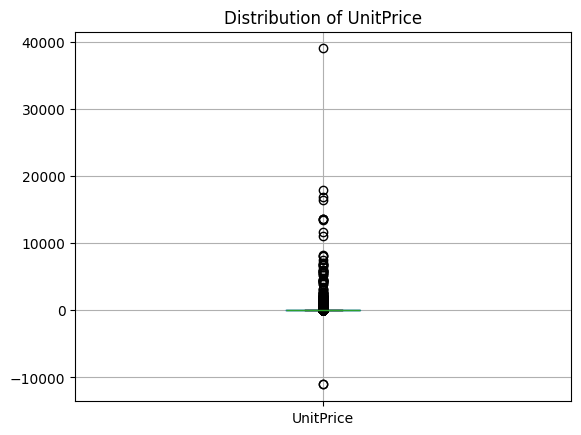

In [28]:
fig, ax = plt.subplots(1,1)
df_cleaned.boxplot(column='UnitPrice',ax=ax)
ax.set_title('Distribution of UnitPrice')
plt.show()

In [29]:
df_cleaned.reset_index(drop=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### EDA

#### Some data type coversion and column creation for easy interpretation

In [30]:
# converting invoice date to date time format

df_cleaned['InvoiceDate']=pd.to_datetime(df_cleaned['InvoiceDate'])

C:\Users\C9946505\AppData\Local\Temp\ipykernel_28016\2466745975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate']=pd.to_datetime(df_cleaned['InvoiceDate'])


In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  object        
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.8+ MB


#### Creating new columns for cancelation and return transaction

In [32]:
# checking the data

print(df_cleaned[df_cleaned['InvoiceNo'].str.startswith('C')].shape[0])

df_cleaned[(df_cleaned['InvoiceNo'].str.startswith('C'))].head()


9251


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [33]:
# checking wheather -ve quantity and invoice starts with c are same or not

df_cleaned[(df_cleaned['InvoiceNo'].str.startswith('C')) & (df_cleaned['Quantity']<0)].shape[0]


9251

In [34]:
df_cleaned[df_cleaned['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [35]:
df_cleaned[(~df_cleaned['InvoiceNo'].str.startswith('C')) & (df_cleaned['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,RECIPE BOX WITH METAL HEART,-10,2010-12-01 16:50:00,0.0,unknown customer 14,United Kingdom
4347,536764,84952C,MIRROR LOVE BIRD T-LIGHT HOLDER,-38,2010-12-02 14:42:00,0.0,unknown customer 20,United Kingdom
7188,536996,22712,CARD DOLLY GIRL,-20,2010-12-03 15:30:00,0.0,unknown customer 37,United Kingdom
7189,536997,22028,PENNY FARTHING BIRTHDAY CARD,-20,2010-12-03 15:30:00,0.0,unknown customer 38,United Kingdom
7190,536998,85067,CREAM SWEETHEART WALL CABINET,-6,2010-12-03 15:30:00,0.0,unknown customer 39,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,unknown customer 3507,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,unknown customer 3509,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,unknown customer 3510,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,unknown customer 3513,United Kingdom


#### Definng the conditions for Purchase, return & canceled items and creating a new variable 

In [36]:
# Defineing the conditions
conditions = [(~df_cleaned['InvoiceNo'].str.startswith('C')) & (df_cleaned['Quantity'] < 0),
              df_cleaned['InvoiceNo'].str.startswith('C')]

# Define the corresponding values
values = ['Return', 'Canceled']

# New column creation
df_cleaned['Transaction_status'] = np.select(conditions, values, default='Purchased')

C:\Users\C9946505\AppData\Local\Temp\ipykernel_28016\1567273986.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Transaction_status'] = np.select(conditions, values, default='Purchased')


In [37]:
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Purchased
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Purchased
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Purchased
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Purchased
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Purchased
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Purchased


#### Creating new columns for Year, Month, Date, DayTime cluster

In [38]:
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.strftime('%B')
df_cleaned['Date'] = df_cleaned['InvoiceDate'].dt.date
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day_name()

C:\Users\C9946505\AppData\Local\Temp\ipykernel_28016\3069327931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
C:\Users\C9946505\AppData\Local\Temp\ipykernel_28016\3069327931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.strftime('%B')
C:\Users\C9946505\AppData\Local\Temp\ipykernel_28016\3069327931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [39]:
# Defining time conditions for day times

def time_of_day(hour):
    if 5 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# creating Time of the day column

df_cleaned['Time_of_Day'] =df_cleaned['InvoiceDate'].dt.hour.apply(time_of_day)

C:\Users\C9946505\AppData\Local\Temp\ipykernel_28016\4164687075.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time_of_Day'] =df_cleaned['InvoiceDate'].dt.hour.apply(time_of_day)


In [40]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_status,Year,Month,Date,Day,Time_of_Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning


In [41]:
# transaction timeline
print(df_cleaned['Date'].min(),'-',df_cleaned['Date'].max())


2010-12-01 - 2011-12-09


**1 Year of Transaction data is given**

#### Breif summary of transaction, product, Country and customer

In [42]:
df_summary = pd.DataFrame([{'products': len(df_cleaned['StockCode'].value_counts()),
                           'transactions': len(df_cleaned['InvoiceNo'].value_counts()),
                           'Known_customer (With_custID)': len(df_cleaned['CustomerID'].value_counts())-Possible_unknown_customer,
                           'Total_customers': len(df_cleaned['CustomerID'].value_counts())}], 
                         columns = ['products', 'transactions','Known_customer (With_custID)','Total_customers'], index = ['Quantity'])
df_summary

,products,transactions,Known_customer (With_custID),Total_customers
Quantity,4070,25900,4372,8082


In [43]:
# no of orders as per transaction status
Brief_transaction=df_cleaned.groupby('Transaction_status')['InvoiceNo'].nunique().reset_index()
Brief_transaction['%_Value']= (Brief_transaction['InvoiceNo']/len(df_cleaned['InvoiceNo'].value_counts())*100).round()
Brief_transaction

,Transaction_status,InvoiceNo,%_Value
0,Canceled,3836,15.0
1,Purchased,20728,80.0
2,Return,1336,5.0


In [44]:
# No of customer per country

customer=df_cleaned.groupby('Country')['CustomerID'].nunique().reset_index().sort_values(by='CustomerID', ascending=False)
customer['Cust_id%']=(customer['CustomerID']/len(df_cleaned['CustomerID'].value_counts())*100).round(2)

'''we can see ~94% of customer are from UK'''
print(customer['Country'].nunique())
customer

38


,Country,CustomerID,Cust_id%
36,United Kingdom,7587,93.88
14,Germany,95,1.18
13,France,90,1.11
10,EIRE,44,0.54
31,Spain,31,0.38
3,Belgium,25,0.31
33,Switzerland,24,0.30
27,Portugal,20,0.25
19,Italy,15,0.19
16,Hong Kong,15,0.19


#### Customer wise no of successful / unsuccessful transactions

In [45]:
# Top 10 Customer with highest highest no of purchased basket
transaction_counts = df_cleaned.groupby(['CustomerID', 'Transaction_status']).size().unstack(fill_value=0).sort_values(by='Purchased', ascending=False)

transaction_counts = transaction_counts[['Purchased', 'Return', 'Canceled']]

transaction_counts.head(10)

Transaction_status,Purchased,Return,Canceled
CustomerID,,,
17841.0,7676,0,136
14911.0,5672,0,226
14096.0,5111,0,17
12748.0,4413,0,46
14606.0,2677,0,82
15311.0,2366,0,112
14646.0,2080,0,5
13089.0,1814,0,39
13263.0,1667,0,0


In [46]:
# Top 10 Customer with highest no of cacelation basket
transaction_counts.sort_values(by='Canceled', ascending=False).head(10)

Transaction_status,Purchased,Return,Canceled
CustomerID,,,
14911.0,5672,0,226
17841.0,7676,0,136
17511.0,963,0,113
15311.0,2366,0,112
12607.0,101,0,101
14410.0,190,0,92
13798.0,349,0,89
14606.0,2677,0,82
13113.0,201,0,79


In [47]:
# Customer with return basket
transaction_counts.sort_values(by='Return', ascending=False).head()

Transaction_status,Purchased,Return,Canceled
CustomerID,,,
unknown customer 978,0,1,0
unknown customer 2452,0,1,0
unknown customer 96,0,1,0
unknown customer 969,0,1,0
unknown customer 97,0,1,0


#### Basket analysis  
(AOV, Average parts per basket, total purchased)

In [48]:
# creating a new column for total value for each product
df_cleaned['Total_Price']=df_cleaned['UnitPrice']*df_cleaned['Quantity']
df_cleaned.head()

C:\Users\C9946505\AppData\Local\Temp\ipykernel_28016\1951133294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total_Price']=df_cleaned['UnitPrice']*df_cleaned['Quantity']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_status,Year,Month,Date,Day,Time_of_Day,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,20.34


In [49]:
## Avg basket value for only transaction status as purchased

# Filtering Purchased baskets
Filtered = df_cleaned[df_cleaned['Transaction_status'] == 'Purchased']

# Total price for 'Purchased' transactions
total_value_purchased = Filtered['Total_Price'].sum()
print(round(total_value_purchased,2),'Million')

#Avg basket value
print(round(total_value_purchased/Filtered['InvoiceNo'].nunique(),2))


10619986.68 Million
512.35


In [50]:
## Avg product per basket
print(round(Filtered.groupby('InvoiceNo')['StockCode'].count().reset_index()['StockCode'].mean()))

## Highest products per basket
Filtered.groupby('InvoiceNo')['StockCode'].count().reset_index().sort_values('StockCode',ascending=False).head(20)


25


,InvoiceNo,StockCode
16985,573585,1114
20563,581219,749
20696,581492,731
20326,580729,721
9958,558475,705
19858,579777,687
20561,581217,676
539,537434,675
20327,580730,662
825,538071,652


#### Popular product

In [51]:
## most common or popular product per basket

Filtered.groupby(['StockCode', 'Description'])['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo', ascending=False).head(20)


,StockCode,Description,InvoiceNo
3806,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2248
3784,85099B,JUMBO BAG RED RETROSPOT,2112
1404,22423,REGENCY CAKESTAND 3 TIER,2009
2999,47566,PARTY BUNTING,1700
193,20725,LUNCH BAG RED RETROSPOT,1581
3568,84879,ASSORTED COLOUR BIRD ORNAMENT,1476
1702,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1394
480,21212,PACK OF 72 RETROSPOT CAKE CASES,1352
196,20727,LUNCH BAG BLACK SKULL.,1301
1437,22457,NATURAL SLATE HEART CHALKBOARD,1255


In [52]:
## By price top 10 products contributing to revenue
Filtered.groupby(['StockCode', 'Description'])['Total_Price'].sum().reset_index().sort_values(by='Total_Price', ascending=False).head(20)

,StockCode,Description,Total_Price
4325,DOT,DOTCOM POSTAGE,206248.77
1404,22423,REGENCY CAKESTAND 3 TIER,174156.54
2775,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3806,85123A,WHITE HANGING HEART T-LIGHT HOLDER,104284.24
2999,47566,PARTY BUNTING,99445.23
3784,85099B,JUMBO BAG RED RETROSPOT,94159.81
2219,23166,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
4328,POST,POSTAGE,78101.88
4326,M,Manual,77750.27
2117,23084,RABBIT NIGHT LIGHT,66870.03


In [53]:
## most common or popular product per basket

grouped = Filtered.groupby('StockCode')['InvoiceNo'].count().reset_index()
grouped.columns = ['StockCode', 'Count']
grouped.merge(Filtered[['StockCode', 'Description']].drop_duplicates(), on='StockCode').sort_values(by='Count', ascending=False)


,StockCode,Count,Description
3805,85123A,2258,WHITE HANGING HEART T-LIGHT HOLDER
3806,85123A,2258,CREAM HANGING HEART T-LIGHT HOLDER
3784,85099B,2112,JUMBO BAG RED RETROSPOT
1404,22423,2009,REGENCY CAKESTAND 3 TIER
2999,47566,1700,PARTY BUNTING
...,...,...,...
3407,84596l,1,BISCUITS SMALL BOWL LIGHT BLUE
3352,84510e,1,SET OF 4 GREEN CAROUSEL COASTERS
4239,90187A,1,BLUE DROP EARRINGS W BEAD CLUSTER
4232,90184c,1,BLACK CHUNKY BEAD BRACELET W STRAP


In [54]:
## Popular product based on quantity

Filtered.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)


,StockCode,Description,Quantity
2775,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2219,23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
3268,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
3784,85099B,JUMBO BAG RED RETROSPOT,48375
3806,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37584
1191,22197,POPCORN HOLDER,36749
480,21212,PACK OF 72 RETROSPOT CAKE CASES,36396
3568,84879,ASSORTED COLOUR BIRD ORNAMENT,36362
2117,23084,RABBIT NIGHT LIGHT,31555
1470,22492,MINI PAINT SET VINTAGE,26633


#### Products bought together



In [55]:
from itertools import combinations
from collections import Counter

invoice_groups = Filtered.groupby('InvoiceNo')['StockCode'].apply(list)

# Generate pairs of StockCodes for each invoice and count occurrences
pair_counts = Counter(pair for items in invoice_groups for pair in combinations(items, 2))

# Convert the Counter object to a DataFrame for better readability
pair_counts_df = pd.DataFrame(pair_counts.items(), columns=['Pair', 'Count']).sort_values(by='Count', ascending=False)

pair_counts_df

,Pair,Count
11502,"(22386, 85099B)",541
106651,"(22697, 22699)",486
267841,"(22411, 85099B)",465
140052,"(85099B, DOT)",461
6632,"(21931, 85099B)",453
...,...,...
5795139,"(84993A, 79321)",1
5795140,"(84993A, 37500)",1
5795141,"(22906, 22894)",1
5795142,"(22906, 22704)",1


In [56]:
invoice_groups = Filtered.groupby('InvoiceNo')['StockCode'].apply(list)

# Generate pairs of StockCodes for each invoice and count occurrences
pair_counts = Counter(pair for items in invoice_groups for pair in combinations(items, 2))

# Convert the Counter object to a DataFrame for better readability
pair_counts_df = pd.DataFrame(pair_counts.items(), columns=['Pair', 'Count']).sort_values(by='Count', ascending=False)

# DataFrame for StockCode and Description
description_df = df[['StockCode', 'Description']].drop_duplicates()

# Description importing for each pair
pair_counts_df['Description1'] = pair_counts_df['Pair'].apply(lambda x: description_df[description_df['StockCode'] == x[0]]['Description'].values[0])
pair_counts_df['Description2'] = pair_counts_df['Pair'].apply(lambda x: description_df[description_df['StockCode'] == x[1]]['Description'].values[0])

pair_counts_df

,Pair,Count,Description1,Description2
11502,"(22386, 85099B)",541,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT
106651,"(22697, 22699)",486,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER
267841,"(22411, 85099B)",465,JUMBO SHOPPER VINTAGE RED PAISLEY,JUMBO BAG RED RETROSPOT
140052,"(85099B, DOT)",461,JUMBO BAG RED RETROSPOT,DOTCOM POSTAGE
6632,"(21931, 85099B)",453,JUMBO STORAGE BAG SUKI,JUMBO BAG RED RETROSPOT
...,...,...,...,...
5795139,"(84993A, 79321)",1,75 GREEN PETIT FOUR CASES,CHILLI LIGHTS
5795140,"(84993A, 37500)",1,75 GREEN PETIT FOUR CASES,TEA TIME TEAPOT IN GIFT BOX
5795141,"(22906, 22894)",1,12 MESSAGE CARDS WITH ENVELOPES,TABLECLOTH RED APPLES DESIGN
5795142,"(22906, 22704)",1,12 MESSAGE CARDS WITH ENVELOPES,WRAP RED APPLES


In [57]:
pair_counts_df.head(20)

,Pair,Count,Description1,Description2
11502,"(22386, 85099B)",541,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT
106651,"(22697, 22699)",486,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER
267841,"(22411, 85099B)",465,JUMBO SHOPPER VINTAGE RED PAISLEY,JUMBO BAG RED RETROSPOT
140052,"(85099B, DOT)",461,JUMBO BAG RED RETROSPOT,DOTCOM POSTAGE
6632,"(21931, 85099B)",453,JUMBO STORAGE BAG SUKI,JUMBO BAG RED RETROSPOT
179562,"(20725, 20727)",427,LUNCH BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.
1119623,"(22697, 22698)",397,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER
11621,"(85099B, 85099C)",393,JUMBO BAG RED RETROSPOT,JUMBO BAG BAROQUE BLACK WHITE
2937423,"(23199, 85099B)",389,JUMBO BAG APPLES,JUMBO BAG RED RETROSPOT
152938,"(20719, 20724)",382,WOODLAND CHARLOTTE BAG,RED RETROSPOT CHARLOTTE BAG


#### Free Products

In [58]:
# Total no of free items distributed along with the purchase items

print(df_cleaned[(df_cleaned['UnitPrice'] == 0.0) & (df_cleaned['Quantity'] > 0) & (df_cleaned['Transaction_status'] == 'Purchased')]['StockCode'].count())


# No of unique product (stockcode) distibuted along with the purchase items

print(df_cleaned[(df_cleaned['UnitPrice'] == 0.0) & (df_cleaned['Quantity'] > 0) & (df_cleaned['Transaction_status'] == 'Purchased')]['StockCode'].nunique())


1174
681


In [59]:
df_cleaned[(df_cleaned['UnitPrice'] == 0.0) & (df_cleaned['Quantity'] > 0) & (df_cleaned['Transaction_status'] == 'Purchased')][['StockCode','Description']].drop_duplicates().head(50)

,StockCode,Description
622,22139,RETROSPOT TEA SET CERAMIC 11 PC
1970,21134,Unknown
1971,22145,CHRISTMAS CRAFT HEART STOCKING
1972,37509,NEW ENGLAND MUG W GIFT BOX
1987,85226A,Unknown
1988,85044,Unknown
2024,20950,Unknown
2025,37461,FUNKY MONKEY MUG
2026,84670,Unknown
4348,84952C,MIRROR LOVE BIRD T-LIGHT HOLDER


#### Return and Canceled product type

In [60]:
# Understanding Return product type

returned_items=df_cleaned[df_cleaned['Transaction_status'] == 'Return']
returned_items
returned_items.groupby(['StockCode','Description'])['Quantity'].sum().reset_index().sort_values(by='Quantity').head(20)


,StockCode,Description,Quantity
583,23005,printing smudges/thrown away,-19200
582,23003,Printing smudges/thrown away,-9058
770,72140F,throw away,-5368
827,79323W,"Unsaleable, destroyed.",-4830
16,16045,POPART WOODEN PENCILS ASST,-3667
32,16259,PIECE OF CAMO STATIONERY SET,-3167
68,20713,wrongly marked. 23343 in box,-3100
916,84598,check,-3000
619,23270,incorrect stock entry.,-2880
44,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,-2834


In [61]:
# Understanding Return product type with its unit price

returned_items=df_cleaned[df_cleaned['Transaction_status'] == 'Return']

returned_itemsdf =returned_items.groupby(['StockCode','Description'])['Quantity'].sum().reset_index()

returned_itemsdf

item_code_price1=df_cleaned[df_cleaned['UnitPrice']>0][['StockCode','UnitPrice']]

item_code_price_max= item_code_price1.groupby('StockCode').max()

merged_df1 = returned_itemsdf.merge(item_code_price_max, on='StockCode', how='left')

merged_df1['TotalPrice']=merged_df1['UnitPrice']*merged_df1['Quantity']
print(merged_df1['TotalPrice'].sum())
merged_df1.sort_values(by='TotalPrice').head(30)


-1004962.59


,StockCode,Description,Quantity,UnitPrice,TotalPrice
475,22502,reverse 21/5/10 adjustment,-100,649.50,-64950.00
505,22618,"mouldy, unsaleable.",-1681,19.96,-33552.76
827,79323W,"Unsaleable, destroyed.",-4830,6.75,-32602.50
155,21135,wet rusty,-1152,25.49,-29364.48
504,22617,"mouldy, thrown away.",-2600,10.79,-28054.00
583,23005,printing smudges/thrown away,-19200,1.00,-19200.00
1105,85175,CACTI T-LIGHT CANDLES,-1200,13.57,-16284.00
605,23116,Damaged,-1440,10.79,-15537.60
602,23113,Damaged,-1440,10.79,-15537.60
603,23114,Damaged,-1440,10.79,-15537.60


In [62]:
# Understanding canceled product type

canceled_items=df_cleaned[df_cleaned['Transaction_status'] == 'Canceled']

print(canceled_items['Total_Price'].sum())

canceled_items.groupby(['StockCode','Description'])['Total_Price'].sum().reset_index().sort_values(by='Total_Price').head(20)


-893979.7300000001


,StockCode,Description,Total_Price
1966,AMAZONFEE,AMAZON FEE,-235281.59
1529,23843,"PAPER CRAFT , LITTLE BIRDIE",-168469.60
1972,M,Manual,-146784.46
1270,23166,MEDIUM CERAMIC TOP STORAGE JAR,-77479.64
1973,POST,POSTAGE,-11871.24
723,22423,REGENCY CAKESTAND 3 TIER,-9697.05
1969,CRUK,CRUK Commission,-7933.43
1967,BANK CHARGES,Bank Charges,-7340.64
1859,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-6624.30
133,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-6591.42


In [63]:
canceled_items.groupby('StockCode')['Total_Price'].sum().reset_index().sort_values(by='Total_Price').head(10)

,StockCode,Total_Price
1938,AMAZONFEE,-235281.59
1507,23843,-168469.60
1944,M,-146784.46
1255,23166,-77479.64
1945,POST,-11871.24
716,22423,-9697.05
1941,CRUK,-7933.43
1939,BANK CHARGES,-7340.64
1831,85123A,-6624.30
133,21108,-6591.42


#### Free items monetary value

In [64]:
# Monetary value of these free individual unique items (Max unit price Value)

free_item = df_cleaned[(df_cleaned['UnitPrice'] == 0.0) & (df_cleaned['Quantity'] > 0) & (df_cleaned['Transaction_status'] == 'Purchased')][['StockCode']].drop_duplicates()

free_item_df = pd.DataFrame(free_item, columns=['StockCode']).reset_index(drop=True)

item_code_price=df_cleaned[df_cleaned['UnitPrice']>0][['StockCode','UnitPrice']]

item_code_price_max = item_code_price.groupby('StockCode').max()

merged_df = free_item_df.merge(item_code_price_max, on='StockCode', how='left')

print(round(merged_df['UnitPrice'].sum()))


57271


In [65]:
# Monetary value of these free individual unique items (Minimum unit price Value)

free_item2 = df_cleaned[(df_cleaned['UnitPrice'] == 0.0) & (df_cleaned['Quantity'] > 0) & (df_cleaned['Transaction_status'] == 'Purchased')][['StockCode']].drop_duplicates()

free_item_df2 = pd.DataFrame(free_item, columns=['StockCode']).reset_index(drop=True)

item_code_price2=df_cleaned[df_cleaned['UnitPrice']>0][['StockCode','UnitPrice']]

item_code_price_min = item_code_price.groupby('StockCode').min()

merged_df2 = free_item_df2.merge(item_code_price_min, on='StockCode', how='left')

print(round(merged_df2['UnitPrice'].sum()))


1996


In [66]:
# Monetary value of all free items (Quantity taken and Minimum unit price Value taken)

free_item1=df_cleaned[(df_cleaned['UnitPrice'] == 0.0) & (df_cleaned['Quantity'] > 0) & (df_cleaned['Transaction_status'] == 'Purchased')][['StockCode','Quantity']]

free_item1

merged_df1 = free_item1.merge(item_code_price_min, on='StockCode', how='left')

merged_df1['TotalValue'] = merged_df1['Quantity']* merged_df1['UnitPrice']

print(merged_df1['TotalValue'].sum())

95342.651


#### Month wise sales

In [67]:
# By revenue month wise sales
Filtered.groupby('Month')['Total_Price'].sum().reset_index()

,Month,Total_Price
0,April,536968.491
1,August,735717.260
2,December,1459243.060
3,February,522545.560
4,January,689811.610
5,July,718076.121
6,June,760547.010
7,March,716215.260
8,May,769296.610
9,November,1503866.780


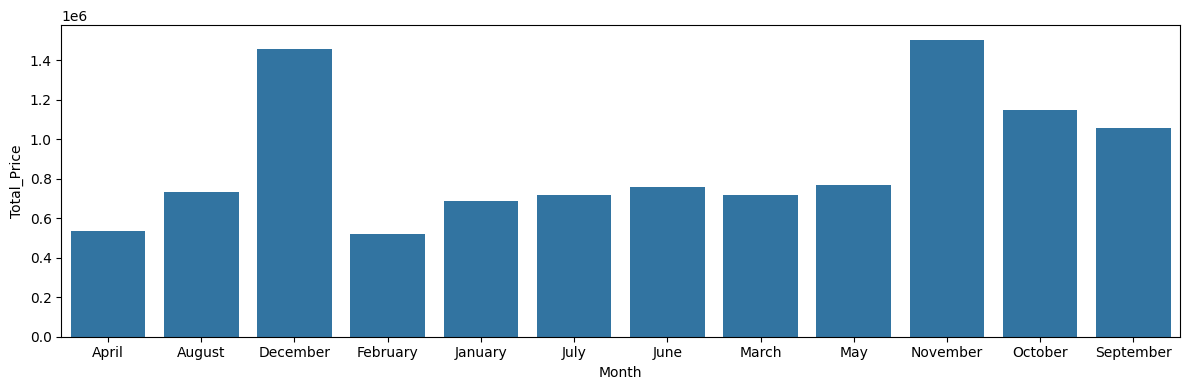

In [68]:
plt.figure(figsize=(12, 4))
sns.barplot(x='Month', y='Total_Price', data=Filtered.groupby('Month')['Total_Price'].sum().reset_index())
plt.tight_layout()

In [69]:
# By Quantity month wise sales
Filtered.groupby('Month')['Quantity'].sum().reset_index()

,Month,Quantity
0,April,311314
1,August,424266
2,December,675510
3,February,286074
4,January,397030
5,July,405473
6,June,393633
7,March,384023
8,May,398686
9,November,768468


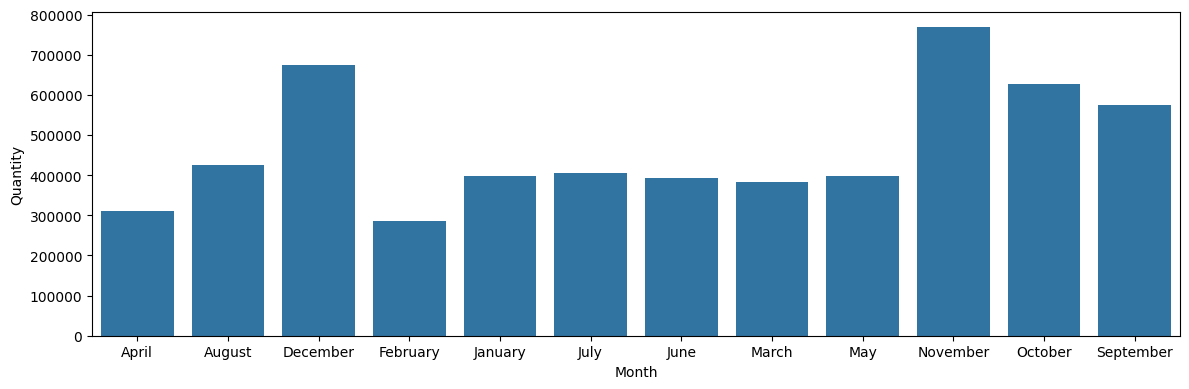

In [70]:
plt.figure(figsize=(12, 4))
sns.barplot(x='Month', y='Quantity', data=Filtered.groupby('Month')['Quantity'].sum().reset_index())
plt.tight_layout()

#### Most product sold in which month

In [71]:
Most_Product=Filtered.groupby(['StockCode','Month','Description'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending =False).head(30)
Most_Product

,StockCode,Month,Description,Quantity
22855,23843,December,"PAPER CRAFT , LITTLE BIRDIE",80995
20503,23166,January,MEDIUM CERAMIC TOP STORAGE JAR,74215
19841,23084,November,RABBIT NIGHT LIGHT,14913
27763,84826,November,ASSTD DESIGN 3D PAPER STICKERS,12551
10808,22197,November,POPCORN HOLDER,12452
26140,84077,April,WORLD WAR 2 GLIDERS ASSTD DESIGNS,10239
26150,84077,October,WORLD WAR 2 GLIDERS ASSTD DESIGNS,8084
9690,22086,November,PAPER CHAIN KIT 50'S CHRISTMAS,7898
10807,22197,May,SMALL POPCORN HOLDER,6841
26142,84077,December,WORLD WAR 2 GLIDERS ASSTD DESIGNS,6562


In [72]:
## Revenue contribution from each product in a particular month

Filtered.groupby(['StockCode','Month','Description'])['Total_Price'].sum().reset_index().sort_values(by='Total_Price', ascending =False).head(30)


,StockCode,Month,Description,Total_Price
22855,23843,December,"PAPER CRAFT , LITTLE BIRDIE",168469.60
20503,23166,January,MEDIUM CERAMIC TOP STORAGE JAR,77183.60
32872,DOT,December,DOTCOM POSTAGE,44543.88
13864,22502,June,PICNIC BASKET WICKER 60 PIECES,39619.50
32879,DOT,November,DOTCOM POSTAGE,36905.40
19841,23084,November,RABBIT NIGHT LIGHT,34478.40
13020,22423,December,REGENCY CAKESTAND 3 TIER,33688.88
9690,22086,November,PAPER CHAIN KIT 50'S CHRISTMAS,28955.54
32892,M,October,Manual,21188.67
24184,47566,May,PARTY BUNTING,19118.05


In [73]:
Filtered

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_status,Year,Month,Date,Day,Time_of_Day,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Purchased,2011,December,2011-12-09,Friday,Afternoon,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Purchased,2011,December,2011-12-09,Friday,Afternoon,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Purchased,2011,December,2011-12-09,Friday,Afternoon,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Purchased,2011,December,2011-12-09,Friday,Afternoon,16.60


#### Day and time wise sales

In [74]:
# By revenue day wise sales
Filtered.groupby('Day')['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo',ascending=False)

,Day,InvoiceNo
3,Thursday,100427
4,Tuesday,99066
1,Monday,92638
5,Wednesday,91710
0,Friday,79869
2,Sunday,62344


In [75]:
Filtered.groupby('Day')['Total_Price'].sum().reset_index().sort_values(by='Total_Price',ascending=False)

,Day,Total_Price
3,Thursday,2199292.570
4,Tuesday,2175700.511
5,Wednesday,1847074.380
0,Friday,1815346.371
1,Monday,1775782.071
2,Sunday,806790.781


In [76]:
#By day time wise
Filtered.groupby(['Time_of_Day'])['InvoiceNo'].nunique().reset_index().sort_values(by='InvoiceNo',ascending=False)

,Time_of_Day,InvoiceNo
0,Afternoon,15050
2,Morning,4567
1,Evening,1111


In [77]:
Filtered.groupby(['Time_of_Day'])['Total_Price'].sum().reset_index().sort_values(by='Total_Price',ascending=False)

,Time_of_Day,Total_Price
0,Afternoon,7195697.821
2,Morning,2749683.902
1,Evening,674604.961


In [78]:
# By revenue grouping DAY and daytime wise sales
Filtered.groupby(['Day','Time_of_Day'])['Total_Price'].sum().reset_index().sort_values(by='Total_Price',ascending=False)

,Day,Time_of_Day,Total_Price
11,Tuesday,Afternoon,1495375.850
8,Thursday,Afternoon,1351895.170
14,Wednesday,Afternoon,1334123.510
3,Monday,Afternoon,1162994.060
0,Friday,Afternoon,1126242.970
6,Sunday,Afternoon,725066.261
2,Friday,Morning,633111.881
13,Tuesday,Morning,605992.471
10,Thursday,Morning,550256.690
16,Wednesday,Morning,453517.940


In [79]:
# By revenue grouping MONTH and daytime wise sales

Filtered.groupby(['Month','Day'])['Total_Price'].sum().reset_index().sort_values(by='Total_Price',ascending=False).head(10)

,Month,Day,Total_Price
12,December,Friday,409635.24
59,November,Wednesday,317115.15
55,November,Monday,306583.03
15,December,Thursday,296803.84
58,November,Tuesday,283511.03
61,October,Monday,271954.18
16,December,Tuesday,248560.13
69,September,Thursday,248130.23
57,November,Thursday,245954.00
70,September,Tuesday,229207.17


In [80]:
'''def time_of_day(hour):
    if 5 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'''

"def time_of_day(hour):\n    if 5 <= hour < 11:\n        return 'Morning'\n    elif 11 <= hour < 17:\n        return 'Afternoon'\n    elif 17 <= hour < 21:\n        return 'Evening'\n    else:\n        return 'Night"

#### Customer wise product purchase in the price point view

In [81]:
Filtered.groupby(['CustomerID','StockCode','Description'])['Total_Price'].sum().reset_index().sort_values(by='Total_Price',ascending= False).head(30)

,CustomerID,StockCode,Description,Total_Price
186943,16446.0,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
0,12346.0,23166,MEDIUM CERAMIC TOP STORAGE JAR,77183.60
129374,15098.0,22502,PICNIC BASKET WICKER 60 PIECES,39619.50
261561,18102.0,21623,VINTAGE UNION JACK MEMOBOARD,16592.08
177181,16210.0,21137,BLACK RECORD COVER FRAME,16027.92
261703,18102.0,82484,WOOD BLACK BOARD ANT WHITE FINISH,15351.00
261575,18102.0,22189,CREAM HEART CARD HOLDER,14089.90
128072,15061.0,22423,REGENCY CAKESTAND 3 TIER,14081.70
268410,unknown customer 100,AMAZONFEE,AMAZON FEE,13541.33
231900,17450.0,22470,HEART OF WICKER LARGE,13459.64


### Customer Analysis

#### Avg Customer Life time value

In [82]:
### Avg customer Lifetime revenue for the given transaction time frame(1 year)

##Filteraning +ve values only (excluding 0) value
Posative_TotalPrice=Filtered.loc[Filtered['Total_Price']>0]

##Avg order value per customer
print(round(Posative_TotalPrice['Total_Price'].sum()/Posative_TotalPrice['CustomerID'].nunique()))


1846


#### Customer wise which product he is purchasing most

In [83]:

x=Posative_TotalPrice.groupby(['CustomerID','StockCode','Description'])['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo',ascending= False)

idx = x.groupby('CustomerID')['InvoiceNo'].idxmax()

# Use the indices to filter the original DataFrame
highest_invoices = x.loc[idx, ['CustomerID', 'StockCode', 'Description', 'InvoiceNo']]

# Sort the result by InvoiceNo in descending order
highest_invoices.sort_values(by='InvoiceNo', ascending=False).reset_index(drop=True)

,CustomerID,StockCode,Description,InvoiceNo
0,14911.0,C2,CARRIAGE,84
1,17841.0,79321,CHILLI LIGHTS,63
2,12748.0,21034,REX CASH+CARRY JUMBO SHOPPER,33
3,12569.0,POST,POSTAGE,31
4,16422.0,22090,PAPER BUNTING RETROSPOT,31
...,...,...,...,...
5761,12371.0,17012D,ORIGAMI ROSE INCENSE/CANDLE SET,1
5762,12373.0,20712,JUMBO BAG WOODLAND ANIMALS,1
5763,12374.0,21106,CREAM SLICE FLANNEL CHOCOLATE SPOT,1
5764,12378.0,15058B,PINK POLKADOT GARDEN PARASOL,1


In [84]:
highest_invoices.sort_values(by='InvoiceNo', ascending=False).reset_index().head(30)

,index,CustomerID,StockCode,Description,InvoiceNo
0,120214,14911.0,C2,CARRIAGE,84
1,251950,17841.0,79321,CHILLI LIGHTS,63
2,21338,12748.0,21034,REX CASH+CARRY JUMBO SHOPPER,33
3,12244,12569.0,POST,POSTAGE,31
4,185889,16422.0,22090,PAPER BUNTING RETROSPOT,31
5,137292,15311.0,15056N,EDWARDIAN PARASOL NATURAL,30
6,17719,12682.0,POST,POSTAGE,29
7,63719,13767.0,21314,SMALL GLASS HEART TRINKET POT,25
8,105561,14646.0,22629,SPACEBOY LUNCH BOX,25
9,77604,14096.0,23263,SET OF 3 WOODEN HEART DECORATIONS,24


#### Customer buying most frequent paired products

In [85]:
def most_paired_product(x):
    result = []
    for customer_id in x['CustomerID'].unique():
        customer_data = x[x['CustomerID'] == customer_id]
        invoice_pairs = []
        for invoice in customer_data['InvoiceNo'].unique():
            products = customer_data[customer_data['InvoiceNo'] == invoice][['Description', 'StockCode']].values.tolist()
            # Convert lists to tuples
            invoice_pairs.extend(combinations([tuple(product) for product in products], 2))
        most_common_pair = Counter(invoice_pairs).most_common(1)
        if most_common_pair:
            result.append((customer_id, most_common_pair[0][0], most_common_pair[0][1]))
    return result

Customer_Product_groups = most_paired_product(Posative_TotalPrice)
Customer_Product_groups

[(17850.0,
  (('WHITE HANGING HEART T-LIGHT HOLDER', '85123A'),
   ('WHITE METAL LANTERN', '71053')),
  17),
 (13047.0,
  (('HOME BUILDING BLOCK WORD', '21754'),
   ('LOVE BUILDING BLOCK WORD', '21755')),
  4),
 (12583.0, (('ALARM CLOCK BAKELIKE PINK', '22728'), ('POSTAGE', 'POST')), 6),
 (13748.0,
  (('REGENCY CAKESTAND 3 TIER', '22423'), ('PAPER CHAIN KIT EMPIRE', '22084')),
  2),
 (15291.0,
  (('HOME BUILDING BLOCK WORD', '21754'),
   ('LOVE BUILDING BLOCK WORD', '21755')),
  3),
 (14688.0,
  (('RECYCLING BAG RETROSPOT ', '22379'), ('SKULL SHOULDER BAG', '21934')),
  5),
 (17809.0,
  (('SET OF 20 VINTAGE CHRISTMAS NAPKINS', '22909'),
   ('PAPER CHAIN KIT VINTAGE CHRISTMAS', '22910')),
  2),
 (15311.0,
  (('EDWARDIAN PARASOL BLACK', '15056BL'),
   ('EDWARDIAN PARASOL NATURAL', '15056N')),
  9),
 (16098.0,
  (('JUMBO SHOPPER VINTAGE RED PAISLEY', '22411'),
   ('ALARM CLOCK BAKELIKE GREEN', '22726')),
  5),
 (18074.0,
  (('WOOD BLACK BOARD ANT WHITE FINISH', '82484'),
   ('COLOUR GLASS

In [86]:
Customer_Product_groups_df=pd.DataFrame(Customer_Product_groups, columns=['CustomerID', 'ProductPair', 'Count'])
Customer_Product_groups_df

Customer_Product_groups_df[['Product1', 'Product2']] = pd.DataFrame(Customer_Product_groups_df['ProductPair'].tolist(), index=Customer_Product_groups_df.index)
Customer_Product_groups_df[['Description1', 'StockCode1']] = pd.DataFrame(Customer_Product_groups_df['Product1'].tolist(), index=Customer_Product_groups_df.index)
Customer_Product_groups_df[['Description2', 'StockCode2']] = pd.DataFrame(Customer_Product_groups_df['Product2'].tolist(), index=Customer_Product_groups_df.index)

# Create the required columns
Customer_Product_groups_df['StockCodes'] = Customer_Product_groups_df['StockCode1'] + ', ' + Customer_Product_groups_df['StockCode2']
Customer_Product_groups_df['Descriptions'] = Customer_Product_groups_df['Description1'] + ', ' + Customer_Product_groups_df['Description2']

# Drop the unnecessary columns
Customer_Product_groups_df = Customer_Product_groups_df.drop(columns=['ProductPair', 'Product1', 'Product2', 'Description1', 'StockCode1', 'Description2', 'StockCode2'])
Customer_Product_groups_df
#Customer_Product_groups_df.sort_values(by='Count', ascending=False).head(30)

,CustomerID,Count,StockCodes,Descriptions
0,17850.0,17,"85123A, 71053","WHITE HANGING HEART T-LIGHT HOLDER, WHITE META..."
1,13047.0,4,"21754, 21755","HOME BUILDING BLOCK WORD, LOVE BUILDING BLOCK ..."
2,12583.0,6,"22728, POST","ALARM CLOCK BAKELIKE PINK, POSTAGE"
3,13748.0,2,"22423, 22084","REGENCY CAKESTAND 3 TIER, PAPER CHAIN KIT EMPIRE"
4,15291.0,3,"21754, 21755","HOME BUILDING BLOCK WORD, LOVE BUILDING BLOCK ..."
...,...,...,...,...
5429,unknown customer 3522,1,"23334, 23336","IVORY WICKER HEART SMALL, EGG FRYING PAN PINK"
5430,unknown customer 3523,1,"23369, 23370","SET 36 COLOUR PENCILS LOVE LONDON, SET 36 COLO..."
5431,unknown customer 3524,4,"21481, 22356","FAWN BLUE HOT WATER BOTTLE, CHARLOTTE BAG PINK..."
5432,unknown customer 3525,1,"15056bl, 20669","EDWARDIAN PARASOL BLACK, RED HEART LUGGAGE TAG"


#### Avg days between two purchases for a customer

In [87]:
df5=Posative_TotalPrice.copy()
df5['Prev_InvoiceDate'] = df5.groupby('CustomerID')['InvoiceDate'].shift(1)
df5['Days_Between_Purchases'] = (df5['InvoiceDate'] - df5['Prev_InvoiceDate']).dt.days
df5.groupby('CustomerID')['Days_Between_Purchases'].mean().reset_index()['Days_Between_Purchases'].mean()


np.float64(2.5535563084732797)

In [88]:
df5.groupby('CustomerID')['Days_Between_Purchases'].mean().reset_index().sort_values(by='Days_Between_Purchases', ascending=False).head(50)


,CustomerID,Days_Between_Purchases
549,13068.0,309.000000
4185,18080.0,223.000000
414,12875.0,219.000000
4191,18087.0,192.000000
435,12908.0,136.000000
4328,18273.0,127.500000
3430,17029.0,126.000000
1844,14865.0,121.333333
1929,14987.0,116.333333
4143,18017.0,114.500000


#### Bucketing High, Medium and low price category

In [89]:
## Bucketing High value, medium value and low value products

product_basket=Posative_TotalPrice.copy()

In [90]:
##Createing buckets for high, medium, and low value products

product_basket['Value_Bucket'] = pd.qcut(product_basket['UnitPrice'], q=3, labels=['Low Value', 'Medium Value', 'High Value'])


In [91]:
product_basket.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_status,Year,Month,Date,Day,Time_of_Day,Total_Price,Value_Bucket
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,15.30,Medium Value
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,20.34,High Value
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,22.00,Medium Value
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,20.34,High Value
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,20.34,High Value


In [92]:
product_basket.groupby('Value_Bucket')['StockCode'].nunique().reset_index()['StockCode'].sum()

C:\Users\C9946505\AppData\Local\Temp\ipykernel_28016\1355689435.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_basket.groupby('Value_Bucket')['StockCode'].nunique().reset_index()['StockCode'].sum()


np.int64(6493)

In [93]:
product_basket['StockCode'].nunique()

3922

In [94]:
unique_stockcodes = product_basket.drop_duplicates(subset=['StockCode']).groupby('Value_Bucket')['StockCode'].count().reset_index()

unique_stockcodes 

C:\Users\C9946505\AppData\Local\Temp\ipykernel_28016\943286218.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_stockcodes = product_basket.drop_duplicates(subset=['StockCode']).groupby('Value_Bucket')['StockCode'].count().reset_index()


,Value_Bucket,StockCode
0,Low Value,1180
1,Medium Value,1204
2,High Value,1538


In [95]:
customer_counts = product_basket.groupby('Value_Bucket')['CustomerID'].nunique().reset_index()
customer_counts.columns = ['Value_Bucket', 'Unique_Customers']

C:\Users\C9946505\AppData\Local\Temp\ipykernel_28016\1005079628.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_counts = product_basket.groupby('Value_Bucket')['CustomerID'].nunique().reset_index()


In [96]:
customer_counts

,Value_Bucket,Unique_Customers
0,Low Value,5084
1,Medium Value,5204
2,High Value,5260


### RFM

In [97]:
RFMdf = Posative_TotalPrice.copy()

In [98]:
RFMdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_status,Year,Month,Date,Day,Time_of_Day,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,December,2010-12-01,Wednesday,Morning,20.34


In [99]:
## RFM metric creation

today_date = RFMdf["InvoiceDate"].max()

# recency
# frequency
# monetary

rfm = RFMdf.groupby("CustomerID").agg({"InvoiceDate": lambda x: (today_date - x.max()).days,
                               "InvoiceNo": lambda x: x.nunique(),
                               "Total_Price": lambda x: x.sum()})

rfm.columns = ["recency", "frequency", "monetary"]
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [100]:
# recency_score
rfm["r_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
# frequency_score
rfm["f_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
# monetary_score
rfm["m_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

In [101]:
rfm

,recency,frequency,monetary,r_score,f_score,m_score
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,5
12347.0,1,7,4310.00,5,5,5
12348.0,74,4,1797.24,3,4,4
12349.0,18,1,1757.55,4,1,4
12350.0,309,1,334.40,1,1,2
...,...,...,...,...,...,...
unknown customer 99,366,1,19.50,1,3,1
unknown customer 990,254,1,1536.03,1,3,4
unknown customer 992,254,1,21627.72,1,3,5


In [102]:
## fm Score
rfm['fm_score'] = ((rfm['f_score'].astype(int) + rfm['m_score'].astype(int)) / 2).round().astype(int)

# Segmenting customers based on RFM scores
def segment_customer(row):
    if (row['r_score'] == 5 and row['fm_score'] == 5) or (row['r_score'] == 5 and row['fm_score'] == 4) or (row['r_score'] == 4 and row['fm_score'] == 5):
        return 'Champions'
    elif (row['r_score'] == 5 and row['fm_score'] == 3) or (row['r_score'] == 4 and row['fm_score'] == 4) or (row['r_score'] == 3 and row['fm_score'] == 5) or (row['r_score'] == 3 and row['fm_score'] == 4):
        return 'Loyal Customers'
    elif (row['r_score'] == 5 and row['fm_score'] == 2) or (row['r_score'] == 4 and row['fm_score'] == 2) or (row['r_score'] == 3 and row['fm_score'] == 3) or (row['r_score'] == 4 and row['fm_score'] == 3):
        return 'Potential Loyalists'
    elif row['r_score'] == 5 and row['fm_score'] == 1:
        return 'Recent Customers'
    elif (row['r_score'] == 4 and row['fm_score'] == 1) or (row['r_score'] == 3 and row['fm_score'] == 1):
        return 'Promising'
    elif (row['r_score'] == 3 and row['fm_score'] == 2) or (row['r_score'] == 2 and row['fm_score'] == 3) or (row['r_score'] == 2 and row['fm_score'] == 2):
        return 'Customers Needing Attention'
    elif row['r_score'] == 2 and row['fm_score'] == 1:
        return 'About to Sleep'
    elif (row['r_score'] == 2 and row['fm_score'] == 5) or (row['r_score'] == 2 and row['fm_score'] == 4) or (row['r_score'] == 1 and row['fm_score'] == 3):
        return 'At Risk'
    elif (row['r_score'] == 1 and row['fm_score'] == 5) or (row['r_score'] == 1 and row['fm_score'] == 4):
        return 'Cant Lose Them'
    elif row['r_score'] == 1 and row['fm_score'] == 2:
        return 'Hibernating'
    elif row['r_score'] == 1 and row['fm_score'] == 1:
        return 'Lost'
    else:
        return 'Unknown'

In [103]:
## Creating new rfm segment column and applying

rfm['rfm_segment'] = rfm.apply(segment_customer, axis=1)

In [104]:
rfm.reset_index(inplace=True)

In [105]:
rfm

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score,fm_score,rfm_segment
0,12346.0,325,1,77183.60,1,1,5,3,At Risk
1,12347.0,1,7,4310.00,5,5,5,5,Champions
2,12348.0,74,4,1797.24,3,4,4,4,Loyal Customers
3,12349.0,18,1,1757.55,4,1,4,2,Potential Loyalists
4,12350.0,309,1,334.40,1,1,2,2,Hibernating
...,...,...,...,...,...,...,...,...,...
5761,unknown customer 99,366,1,19.50,1,3,1,2,Hibernating
5762,unknown customer 990,254,1,1536.03,1,3,4,4,Cant Lose Them
5763,unknown customer 992,254,1,21627.72,1,3,5,4,Cant Lose Them
5764,unknown customer 993,254,1,209.30,1,3,2,2,Hibernating


In [106]:
rfm1=rfm.groupby("rfm_segment")['CustomerID'].count().reset_index()
rfm1

,rfm_segment,CustomerID
0,About to Sleep,82
1,At Risk,413
2,Cant Lose Them,207
3,Champions,1128
4,Customers Needing Attention,1234
5,Hibernating,649
6,Lost,134
7,Loyal Customers,1034
8,Potential Loyalists,737
9,Promising,125


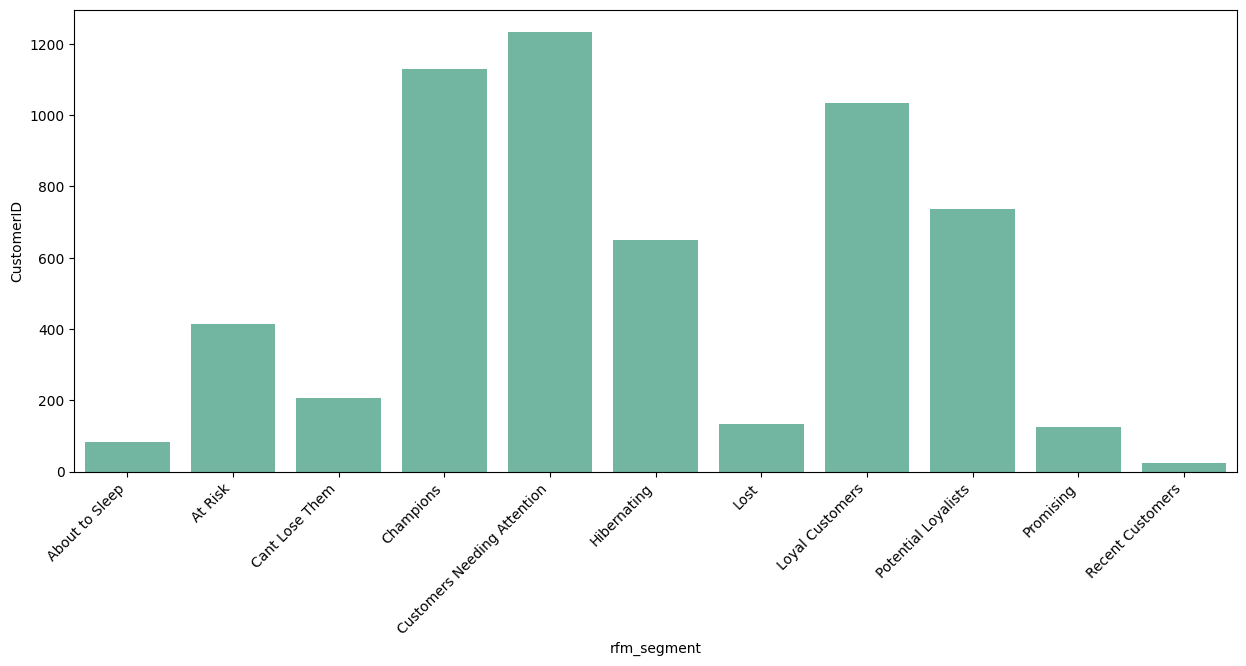

In [107]:
sns.set_palette("Set2")
plt.figure(figsize=(15,6))
sns.barplot(x='rfm_segment', y="CustomerID", data=rfm1)
plt.xticks(rotation=45, ha='right')
plt.show()

In [108]:
from scipy.stats import ttest_ind

champions = rfm[rfm['rfm_segment'] == 'Champions']['monetary']
at_risk = rfm[rfm['rfm_segment'] == 'At Risk']['monetary']

t_stat, p_value = ttest_ind(champions, at_risk)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 4.812602854249144, P-Value: 1.6359890523155881e-06


In [109]:
from scipy.stats import f_oneway

segments = [rfm[rfm['rfm_segment'] == segment]['monetary'] for segment in rfm['rfm_segment'].unique()]
f_stat, p_value = f_oneway(*segments)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

F-Statistic: 40.8920292023962, P-Value: 9.330249316815328e-79


In [110]:
correlation_matrix = rfm[['recency', 'frequency', 'monetary']].corr()
print(correlation_matrix)

            recency  frequency  monetary
recency    1.000000  -0.279638 -0.120024
frequency -0.279638   1.000000  0.541718
monetary  -0.120024   0.541718  1.000000


In [111]:
rfm

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score,fm_score,rfm_segment
0,12346.0,325,1,77183.60,1,1,5,3,At Risk
1,12347.0,1,7,4310.00,5,5,5,5,Champions
2,12348.0,74,4,1797.24,3,4,4,4,Loyal Customers
3,12349.0,18,1,1757.55,4,1,4,2,Potential Loyalists
4,12350.0,309,1,334.40,1,1,2,2,Hibernating
...,...,...,...,...,...,...,...,...,...
5761,unknown customer 99,366,1,19.50,1,3,1,2,Hibernating
5762,unknown customer 990,254,1,1536.03,1,3,4,4,Cant Lose Them
5763,unknown customer 992,254,1,21627.72,1,3,5,4,Cant Lose Them
5764,unknown customer 993,254,1,209.30,1,3,2,2,Hibernating


In [112]:
rfm['r_score'] = rfm['r_score'].astype(int)
rfm['f_score'] = rfm['f_score'].astype(int)
rfm['m_score'] = rfm['m_score'].astype(int)

In [ ]:
from sklearn.cluster import KMeans

# Assuming you want to cluster based on recency, frequency, and monetary values
kmeans = KMeans(n_clusters=5)
rfm['cluster'] = kmeans.fit_predict(rfm[['recency', 'frequency', 'monetary']])

# Analyze the clusters
print(rfm.groupby('cluster').mean())

### Key Insights

1. **Key metric observations**
   - **Key Metric Observation**: Total revenue, No of Products/ customer, country involved, entire transaction period.
   - **Customer Segmentation**: Used RFM (Recency, Frequency, Monetary) analysis to segment customers into categories such as Champions, Loyal Customers, At Risk, Lost, Hibernating, etc.
   - **Transaction Analysis**: Analyzed transaction statuses (Purchased, Canceled, Returned) to understand customer behavior and identify patterns in cancellations and returns.
3. **Customer Behavior**:
   - **Purchase Patterns**: Analyzed average days between purchases, revealing insights into customer purchase frequency.
   - **Basket Analysis**: Examined average order value, average products per basket, and identified products frequently bought together.
4. **Sales Trends**:
   - **Monthly Sales**: Identified peak sales months, with November and December showing the highest sales, likely due to holiday shopping.
   - **Day and Time Analysis**: Analyzed sales by day of the week and time of day, finding that afternoons and Thursdays had the highest sales.
5. **Product Analysis**:
   - **High, Medium, Low Value Products**: Categorized products into high, medium, and low value based on unit price, providing insights into customer preferences for different price ranges.
   - **Free Items**: Analyzed the distribution and monetary value of free items given with purchases.
   - **Product Popularity**: Identified the most popular products and those contributing the most to revenue.

### Recomendations


1. **Targeted Marketing**:
   - **Champions and Loyal Customers**: Focus on retaining these high-value customers with personalized offers and loyalty programs.
   - **At Risk and Hibernating Customers**: Implement re-engagement campaigns to win back these customers, possibly through special discounts or personalized communication.

2. **Product Bundling**:
   - **Frequently Bought Together**: Create product bundles based on items frequently purchased together to increase average order value and enhance customer satisfaction.

3. **Inventory Management**:
   - **Popular Products**: Ensure adequate stock of high-demand products, especially during peak sales months.
   - **Return and Cancellation Analysis**: Investigate the reasons behind high return and cancellation rates for specific products and address any quality or issues.

4. **Sales Promotions**:
   - **Seasonal Campaigns**: Plan promotions around peak sales periods (e.g., holidays) to maximize revenue.
   - **Day and Time-Based Offers**: Consider running special promotions during high-traffic times (afternoons, Thursdays) to boost sales further.

5. **Customer Experience**:
   - **Feedback Loop**: Implement a system to gather and analyze customer feedback regularly to identify areas for improvement in products and services.
   - **Personalization**: Use customer purchase history and preferences to personalize marketing messages and product recommendations.


By Above insight and recomendation company can enhance customer satisfaction, optimize inventory, and drive sales growth